<a href="https://colab.research.google.com/github/tyhardison/Data-Analytics-Project---Health-Variables/blob/main/DataSet_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT CHECKPOINT 1**

---

Name: Tyler Hardison
Course: CSCE 676 - 700

In [54]:
import os, io, gzip, zipfile, tarfile, sys, math, random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

# For reproducibility
random.seed(42)
np.random.seed(42)

print(nx.__version__)
from google.colab import drive
drive.mount('/content/drive')

3.6.1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:

#Imports a dataset as a dataframe from Google Drive and cleans extra columns
def import_dataset(path: str):
    rows = []
    with open(path, newline="", encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
          rows.append(row)
    df = pd.DataFrame(rows)
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.dropna(axis=1, how='all')
    df = df.loc[:, df.columns.notna()]
    df = df.reset_index(drop=True)
    return df


#Imports a dataset as a graph from SNAP database
def download_dataset(url: str, to_path: str):
    import urllib.request
    urllib.request.urlretrieve(url, to_path)
    size = os.path.getsize(to_path) / (1024*1024)


def load_directed_graph(path: str, comment: str = "#", sep: str | None = None):

    G = nx.DiGraph()
    open_fn = gzip.open if path.endswith(".gz") else open

    with open_fn(path, "rt") as f:
        for line in f:
            line = line.strip()

            #Checks for lines with leading #
            if not line or line.startswith(comment):
                continue

            #Checks the delimiter to see how source data is structured
            if sep is None:
                u, v = line.split()
            else:
                u, v = line.split(sep)

            #Adds edge and directed node pair to graph
            G.add_edge(int(u), int(v))

    return G




#GOV - obesity by characteristics for 20+ age adults - RETAIL STYLE
dataset1_path = '/content/drive/MyDrive/CSCE_676/Project/Obesity.csv'
Obesity = import_dataset(dataset1_path)
print("Saved Obesity.csv as a dataframe")

#GOV - crashes/collisions by locations - RETAIL STYLE
  #Each row is a crash event with info on police reports and damage is at least $1000
dataset2_path = '/content/drive/MyDrive/CSCE_676/Project/Collisions.csv'
Collisions = import_dataset(dataset2_path)
print("Saved Collisions.csv as a dataframe")

#SNAP - Google Web Pages and Hyperlinks - DIRECTED GRAPH
dataset3_url = "https://snap.stanford.edu/data/web-Google.txt.gz"
dataset3_path = "web-Google.txt.gz"
download_dataset(dataset3_url, dataset3_path)
Google = load_directed_graph(dataset3_path)
print("Saved web-google.txt.gz as a directed graph")


Saved Obesity.csv as a dataframe
Saved Collisions.csv as a dataframe
Saved web-google.txt.gz as a directed graph


In [74]:
#Function to display raw version of graph - up to k nodes
def visualize_subgraph(G, k: int = 50):
    # Compute PageRank
    pagerank = nx.pagerank(G)

    # Select top-k nodes
    top_k_nodes = sorted(pagerank, key=pagerank.get, reverse=True)[:k]

    # Induced subgraph
    H = G.subgraph(top_k_nodes)

    # Layout and draw
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(H, seed=42)
    nx.draw_networkx_nodes(H, pos, node_size=300)
    nx.draw_networkx_edges(H, pos, arrows=True, alpha=0.6)
    nx.draw_networkx_labels(H, pos, font_size=8)
    plt.title(f"Induced Subgraph of Top-{k} PageRank Nodes")
    plt.axis("off")
    plt.show()


#####Uncomment to display data frames / graph#####
#print(Obesity.head())
#print(Collisions.head())
#visualize_subgraph(Google, 100)

#print(len(Obesity))
#print(len(Collisions))
#print(len(Google))

**Method**

I reused old code from previous assignments in order to implement my download process. I then adjusted parameters and functions to get the dataframes and graphs to a point where they could be displayed and used. In order to import from the csv files, I made sure to remove any empty columns so that it would display without issues.

**Parameters**


*   ***k*** - the nodes that will be displayed. I used 50 to keep the graph simple
*   ***comment str*** - used # as it is the known commen type for my dataset



***Resources***


---

**Collaborators**

- None

**Web Sources**

- City of New York. (2026, February 8). Motor Vehicle Collisions – Crashes. Catalog.Data.gov. Retrieved [insert date you accessed], from https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes

- Jure Leskovec and Andrej Krevl. SNAP Datasets: Stanford Large Network Dataset Collection. http://snap.stanford.edu/data

- U.S. Department of Health & Human Services. (2025, December 13). Nutrition, Physical Activity, and Obesity – Behavioral Risk Factor Surveillance System. Catalog.Data.gov. Retrieved [insert date you accessed], from https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system



**AI Tools**

- None

**Citations**

- None

**(PART A) IDENTIFYING DATASETS**



*   ***Normal Weight, Overweight and Obesity Among Adults Aged 20 and Over***

    *   Course Topic
          *   Frequent Itemsets
          *   Anamoly Detection
    *   Beyond Course Topic
          *   Multiple Linear/Logistic Regression
          *   MANOVA
    *   Dataset Size and Structure
          *   110,880 Health Records
          *   Variable-Length Item Baskets
    *   Data Types
          *   Integer Dates, Income, Location ID, Sample Size, Confidence, Percent Value
          *   String Age/Body Description, Geolocation, Income, Sex, Education, Race, Unit Type
    *   Target Variables
          *   Demographic Contribution Factors
    *   Licensing or Usage Constraints
          *  Opne Database License (ODbL)

*   ***Motor Vehicle Collisions - Crashes***
    
    *   Course Topic
          *   Frequent Itemsets
    *   Beyond Course Topic
          *   Principal Component Analysis
          *   Chi-squared Test
    *   Dataset Size and Structure
          *   2,241,317 Police Records
          *   Variable-Length Item Baskets
    *   Data Types
          *   Date/Time Stamps
          *   String Locations, Cause Descriptions, Vehicle Names, Collision ID
          *   Integer Injury, Mortality, Pedestrian, Passenger Counts
    *   Target Variables
          *   Noise Factor (Surrounding Activity)
          *   Violation Factor
    *   Licensing or Usage Constraints
          *   List item
          *   List item
*   ***Google Webpages Connected through Hyperlinks***

    *   Course Topic
          *   Graph Mining
          *   Page Rank
          *   Clsutering
    *   Beyond Course Topic
          *   Graph Neural Networks
    *   Dataset Size and Structure
          *   875,713 Webpages
          *   Directed Graph Clusters
    *   Data Types
          *   Node ID, Directed Node ID
    *   Target Variables
          *   Site Traffic
          *   Search vs Visting Rank
    *   Licensing or Usage Constraints
          *  BSD License



In [75]:
# ============================================================
# COMBINED QUANTITATIVE AND QUALITATIVE DATASET ANALYSIS
# ============================================================

import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import skew

# ----------------------------
# SAFE SKEW FUNCTION
# ----------------------------
def safe_skew(arr):
    arr = np.array(arr)
    if len(arr) == 0 or np.all(arr == arr[0]):
        return 0.0  # constant or empty => skew = 0
    return skew(arr)

# ----------------------------
# TABULAR ANALYSIS
# ----------------------------
def analyze_tabular(df):
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    n_rows, n_cols = df.shape
    total_cells = n_rows * n_cols
    missing_ratio = df_numeric.isnull().sum().sum() / total_cells

    numeric_cols = df_numeric.select_dtypes(include=np.number)

    # Average skew
    avg_skew = None
    if len(numeric_cols.columns) > 0:
        avg_skew = numeric_cols.apply(lambda x: safe_skew(x.dropna()), axis=0).mean()

    # Feature dimensionality (columns)
    dimensionality = n_cols


    return {
        "Data Type": "Tabular",
        "Rows (n)": n_rows,
        "Columns (d)": n_cols,
        "Dimensionality (d)": dimensionality,
        "Missing Ratio": round(missing_ratio, 4),
        "Avg Skew": round(avg_skew, 3) if avg_skew is not None else "N/A",
    }

# ----------------------------
# GRAPH ANALYSIS
# ----------------------------
def analyze_graph(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()

    density = nx.density(G)
    avg_degree = sum(dict(G.degree()).values()) / n

    in_degrees = [d for _, d in G.in_degree()]
    out_degrees = [d for _, d in G.out_degree()]

    in_skew = safe_skew(in_degrees)
    out_skew = safe_skew(out_degrees)

    try:
        reciprocity = nx.reciprocity(G)
        if reciprocity is None:
            reciprocity = 0
    except:
        reciprocity = 0

    wcc = list(nx.weakly_connected_components(G))
    largest_wcc = max(wcc, key=len)

    return {
        "Data Type": "Directed Graph",
        "Nodes (n)": n,
        "Edges (m)": m,
        "Density": round(density, 8),
        "Avg Degree": round(avg_degree, 3),
        "In-Degree Skew": round(in_skew, 3),
        "Out-Degree Skew": round(out_skew, 3),
        "Reciprocity": round(reciprocity, 5),
        "Largest WCC Size": len(largest_wcc)
    }

# ----------------------------
# RUN ANALYSIS
# ----------------------------
obesity_metrics = analyze_tabular(Obesity)
collisions_metrics = analyze_tabular(Collisions)
google_metrics = analyze_graph(Google)

# ----------------------------
# CREATE QUANTITATIVE COMPARISON TABLE
# ----------------------------
comparison_table = pd.DataFrame({
    "Obesity Dataset": obesity_metrics,
    "Collisions Dataset": collisions_metrics,
    "Web-Google Graph": google_metrics
}).fillna("N/A")

print("\n===== Quantitative Comparative Dataset Analysis =====\n")
display(comparison_table)

# ----------------------------
# CREATE QUALITATIVE PRINCIPLES TABLE
# ----------------------------
def generate_principles_table(obesity_metrics, collisions_metrics, google_metrics):
    table = pd.DataFrame({
        "Dimension": [
            "Supports Frequent Itemset Mining (Apriori)",
            "Supports Sequential Pattern Mining",
            "Supports Graph Centrality / Node Embeddings",
            "Significant Missing Data",
            "Noise in Dataset",
            "High Numeric Skew / Outliers",
            "Potential Bias",
            "Ethical Considerations"
        ],
        "Obesity Dataset": [
            "X" if obesity_metrics["Columns (d)"] > 1 else "",
            "X",  # sequential patterns unlikely
            "",  # not a graph
            "X" if obesity_metrics["Missing Ratio"] > 0.05 else "",
            "X",
            "X" if obesity_metrics["Avg Skew"] != "N/A" and abs(obesity_metrics["Avg Skew"]) > 1 else "",
            "X",  # demographic bias possible
            "X"   # health data sensitive
        ],
        "Collisions Dataset": [
            "X" if collisions_metrics["Columns (d)"] > 1 else "",
            "X",  # event sequence mining possible
            "",   # not a graph
            "X" if collisions_metrics["Missing Ratio"] > 0.05 else "",
            "",
            "X" if collisions_metrics["Avg Skew"] != "N/A" and abs(collisions_metrics["Avg Skew"]) > 1 else "",
            "X",  # reporting/sampling bias
            "X"   # sensitive accident info
        ],
        "Web-Google Graph": [
            "",   # not tabular
            "",   # not tabular
            "X",  # graph analysis applicable
            "",   # missing ratio not meaningful
            "",
            "",   # numeric skew not meaningful
            "X",  # sampling bias in web crawl
            ""    # usually no ethical concern
        ]
    })
    return table

principles_table = generate_principles_table(obesity_metrics, collisions_metrics, google_metrics)

print("\n===== Qualitative Analytical Principles =====\n")
display(principles_table)



===== Quantitative Comparative Dataset Analysis =====



,Obesity Dataset,Collisions Dataset,Web-Google Graph
Data Type,Tabular,Tabular,Directed Graph
Rows (n),110880,2241317,N/A
Columns (d),33,29,N/A
Dimensionality (d),33,29,N/A
Missing Ratio,0.7756,0.6041,N/A
Avg Skew,0.518,8.461,N/A
Nodes (n),N/A,N/A,875713
Edges (m),N/A,N/A,5105039
Density,N/A,N/A,0.000007
Avg Degree,N/A,N/A,11.659



===== Qualitative Analytical Principles =====



,Dimension,Obesity Dataset,Collisions Dataset,Web-Google Graph
0,Supports Frequent Itemset Mining (Apriori),X,X,
1,Supports Sequential Pattern Mining,X,X,
2,Supports Graph Centrality / Node Embeddings,,,X
3,Significant Missing Data,X,X,
4,Noise in Dataset,X,,
5,High Numeric Skew / Outliers,,X,
6,Potential Bias,X,X,X
7,Ethical Considerations,X,X,


**Method**

In my implementation of this comparative anlaysis, I first check the average skew, ignore lines where data is empty. Using the skew functions, I then easily look up different chosen values to compare by for the tabular datasets. I then pulled the graph data with networkx functions.

**Parameters**


*   None

***Resources***


---

**Collaborators**

- None

**Web Sources**

- https://networkx.org/documentation/stable/reference/functions.html

**AI Tools**

- I prompted ChatGPT by providing it with each dataset I was working with and had it pull out key characteristics, focusing on blank entires and entries with long strings of content. I then had it create a table of Xs indicating true/false values in order to compare and contrast the quality of each dataset. After a few trial and error attempts, I successfully got to a quality table I liked.

**Citations**

- None

**(PART B) COMPARTIVE ANALYSIS OF DATASETS**

In the above tables, we can see that the dataset recording **Collions in NYC** is by far the one with the most data to work with, exceeding the **Obesity** dataset by over 1.1M records. Additionally, given the table, it is more favorable in terms of missing data, with a 10% smaller ratio of information unobtained. However, what the charts do not show are the kinds of data types that are missing from each.

In the **Obesity** dataset, the 78% missing datapoints are percentage points regarding the weights of each attribute as they relate to the outcomes being analyzed. In other words, while this data is missing, it is not necessary to form a throrough analysis of the information provided. Only when we want to dive deeper into quantifiable characteristics, does this become pertinent. In contrast, with **Collisions in NYC**, the missing data mostly consists of key attributes such as location, surroundings, and other identifiable charactertics that provide meaning to these relationships.

Finally, moving on to the **Web-Google** dataset, we are now looking at data structure of our graph. Overall, there is a large skew towards in-degree of nodes and very low density and reciprocity. This indicates low connectivity and centrality amongst relationships within the graph.

**(PART C) DATASET SELECTION**

**Dataset**

Obesity (Nutrition, Physica Activty and Obesity - Behavioral Risk Factor Surveillance)

**Reasoning**

This dataset has several different attributes and quantifies those attributes in a way that allows for ample support of multiple frequent itemsets and should allow us to form very useful association rules to aid analysis. I anticipate being able to use the Apriori algorithm here to discover multiple perspective on the topic of demographic vs obesity and am curious to find sequential patterns on the subject as well.

**Trade-Offs**

The dataset is very noisy with many attributes being description heavy. However, these descriptors consistent and should easily parsed in order to draw more uniform points of measurment to work with. In fact, I can create a list of unique values to search, clean and bucket by in order to break down analysis better, since records are standardized formatting. Additionally, the study is based on observational data so there could be personal bias from people evaluating their own bodies and income. In otherwords, the threshold of different body types may be different for those recording the data.

In [58]:
# ==============================
# CLEAN + STANDARDIZE DATASET
# ==============================

def clean_obesity_dataset(df):

    df = df.copy()

    # ---------------------------
    # 1. Remove invalid rows
    # ---------------------------
    df = df[df["Data_Value"] != ""]
    df = df[df["Sample_Size"] != ""]

    # ---------------------------
    # 2. Remove "Total" demographic rows
    # ---------------------------
    df = df[df["Stratification1"] != "Total"]

    # ---------------------------
    # 3. Keep only necessary columns
    # ---------------------------
    cols_to_keep = [
        "YearStart",
        "LocationDesc",
        "Question",
        "Data_Value",
        "Sample_Size",
        "StratificationCategory1",
        "Stratification1"
    ]
    df = df[cols_to_keep]

    # ---------------------------
    # 4. Rename core columns
    # ---------------------------
    df = df.rename(columns={
        "YearStart": "Year",
        "LocationDesc": "State",
        "Question": "Health_Variable",
        "Data_Value": "Value_Percent"
    })

    # ---------------------------
    # 5. Convert numeric columns
    # ---------------------------
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
    df["Value_Percent"] = pd.to_numeric(df["Value_Percent"], errors="coerce")
    df["Sample_Size"] = pd.to_numeric(df["Sample_Size"], errors="coerce")

    # ---------------------------
    # 6. Standardize Health Labels
    # ---------------------------
    health_map = {
        "Percent of adults aged 18 years and older who have obesity": "Obese",
        "Percent of adults aged 18 years and older who have an overweight classification": "Overweight",
        "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)": "Aerobic_150",
        "Percent of adults who achieve more than 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)": "Aerobic_300",
        "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination) and engage in muscle-strengthening activities on 2 or more days a week": "Aerobic_150_Strength",
        "Percent of adults who engage in muscle-strengthening activities on 2 or more days a week": "Strength_2plus_days",
        "Percent of adults who engage in no leisure-time physical activity": "No_Leisure_Aerobic",
        "Percent of adults who report consuming fruit less than one time daily": "Low_Fruit",
        "Percent of adults who report consuming vegetables less than one time daily": "Low_Vegetable"
    }

    df["Health_Variable"] = df["Health_Variable"].map(health_map)

    # ---------------------------
    # 7. Create clean demographic columns
    # ---------------------------
    df["Sex"] = None
    df["Age_Group"] = None
    df["Income_Group"] = None
    df["Education_Level"] = None
    df["Race"] = None

    for idx, row in df.iterrows():
        cat = row["StratificationCategory1"]
        val = row["Stratification1"]

        if cat == "Sex":
            df.at[idx, "Sex"] = val

        elif cat == "Age (years)":
            df.at[idx, "Age_Group"] = val

        elif cat == "Income":
            # Income Bucketing
            if "<" in val or "15,000" in val or "25,000" in val:
                df.at[idx, "Income_Group"] = "Low"
            elif "50,000" in val or "75,000" in val:
                df.at[idx, "Income_Group"] = "Middle"
            elif "75,000" in val:
                df.at[idx, "Income_Group"] = "High"
            else:
                df.at[idx, "Income_Group"] = "High"

        elif cat == "Education":
            df.at[idx, "Education_Level"] = val

        elif cat == "Race/Ethnicity":
            df.at[idx, "Race"] = val

    # ---------------------------
    # 8. Drop old stratification columns
    # ---------------------------
    df = df.drop(columns=["StratificationCategory1", "Stratification1"])

    # ---------------------------
    # 9. Clean string formatting
    # ---------------------------
    for col in ["Sex", "Age_Group", "Income_Group", "Education_Level", "Race"]:
        df[col] = df[col].astype(str).str.strip().str.replace(" ", "_")

    df = df.reset_index(drop=True)

    return df


# Apply cleaning
Obesity_clean = clean_obesity_dataset(Obesity)

print("Cleaned dataset shape:", Obesity_clean.shape)
print(Obesity_clean)


Cleaned dataset shape: (93820, 10)
0      Year           State     Health_Variable  Value_Percent  Sample_Size  \
0      2011         Alabama               Obese           34.8         1367   
1      2011         Alabama               Obese           35.8          757   
2      2011         Alabama               Obese           32.3          861   
3      2011         Alabama               Obese           34.1          785   
4      2011         Alabama               Obese           28.8         1125   
...     ...             ...                 ...            ...          ...   
93815  2024  South Carolina  No_Leisure_Aerobic           15.1           61   
93816  2024           Texas  No_Leisure_Aerobic           31.0          100   
93817  2024        Virginia  No_Leisure_Aerobic           15.5           56   
93818  2024      Washington  No_Leisure_Aerobic           28.4          208   
93819  2024       Wisconsin  No_Leisure_Aerobic           28.0           65   

0       Sex Age_

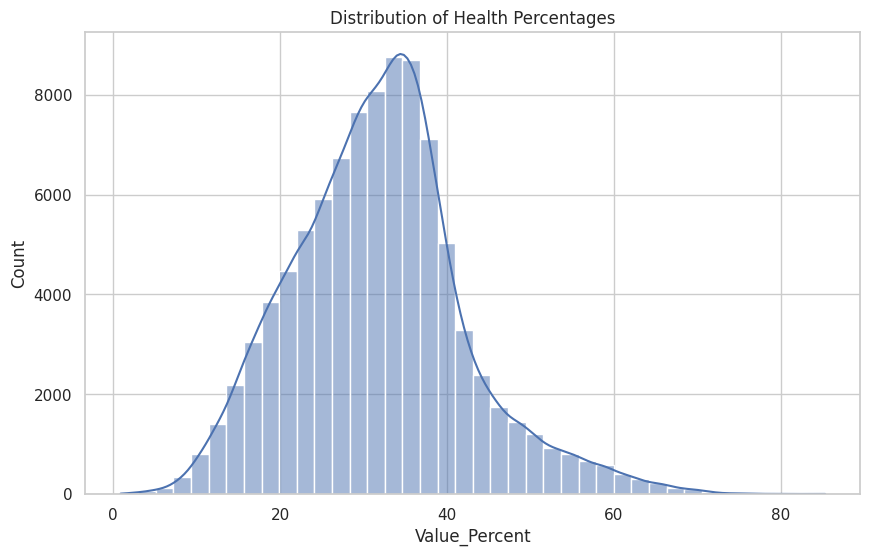

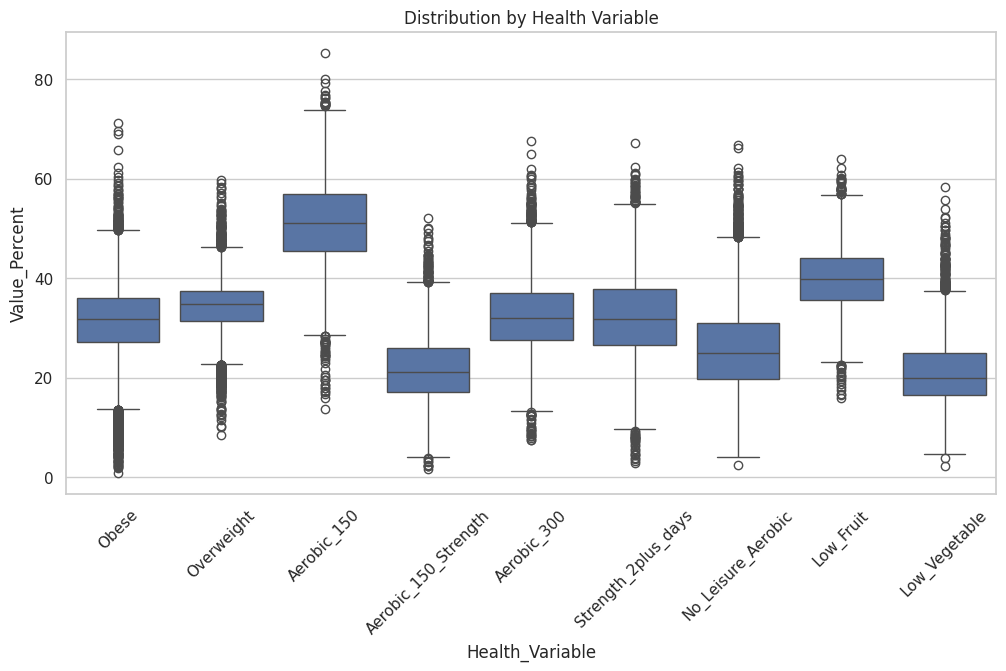

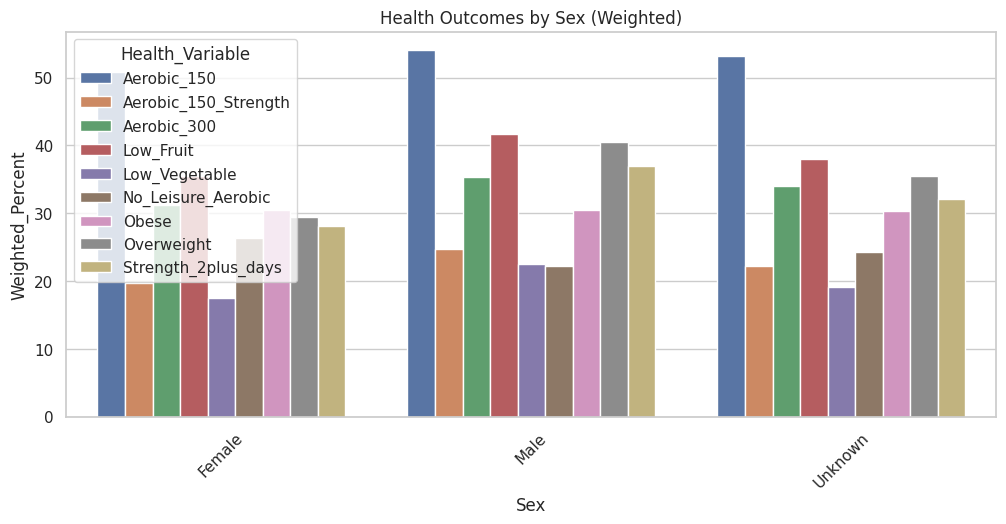

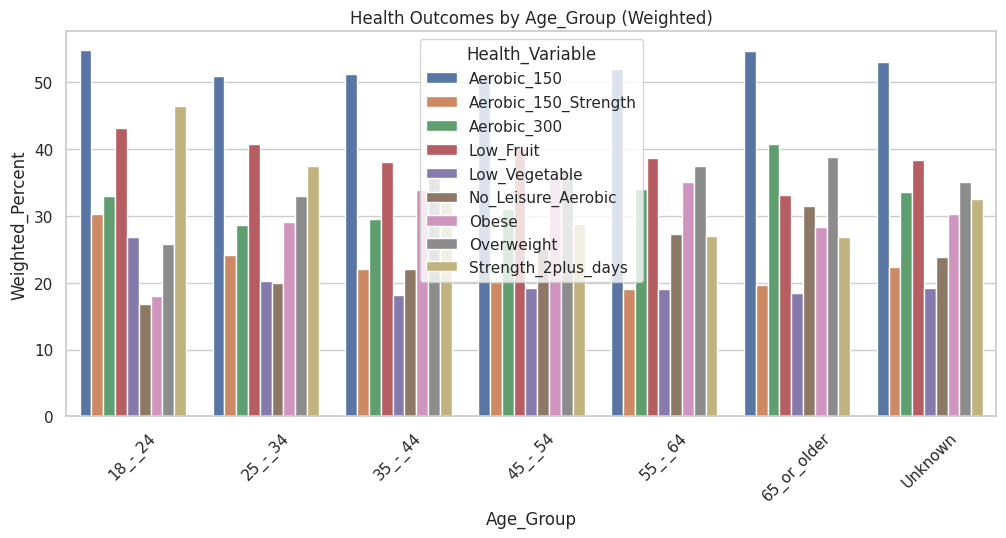

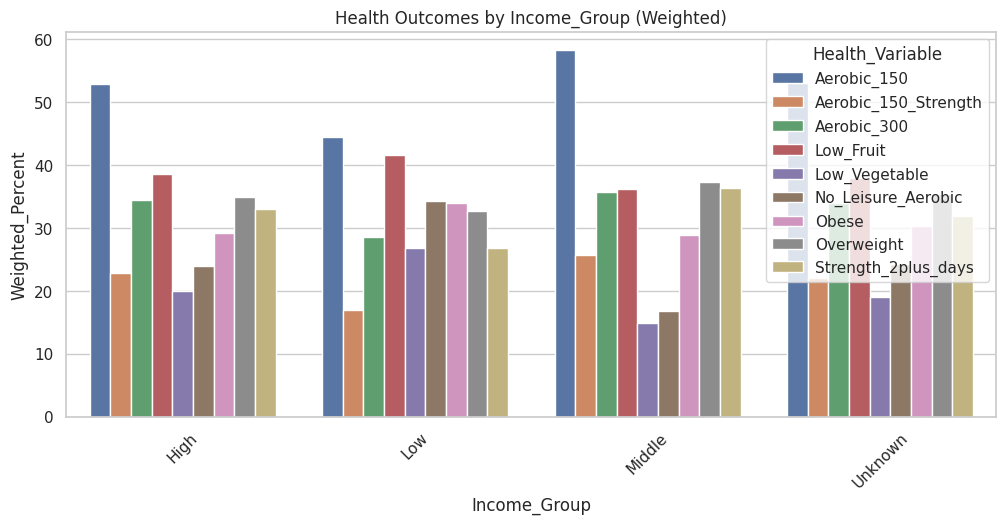

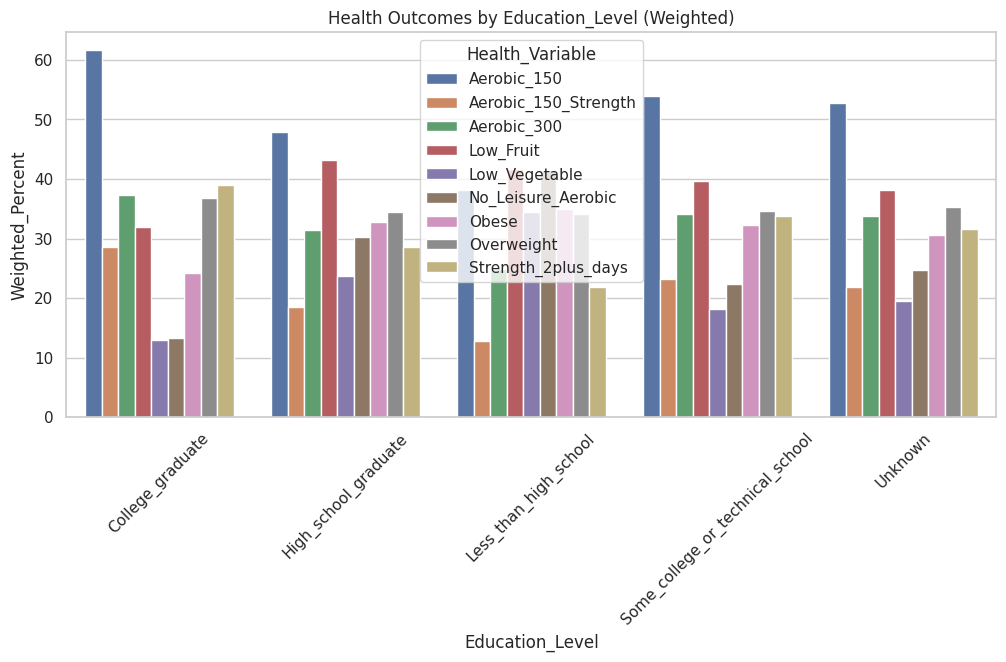

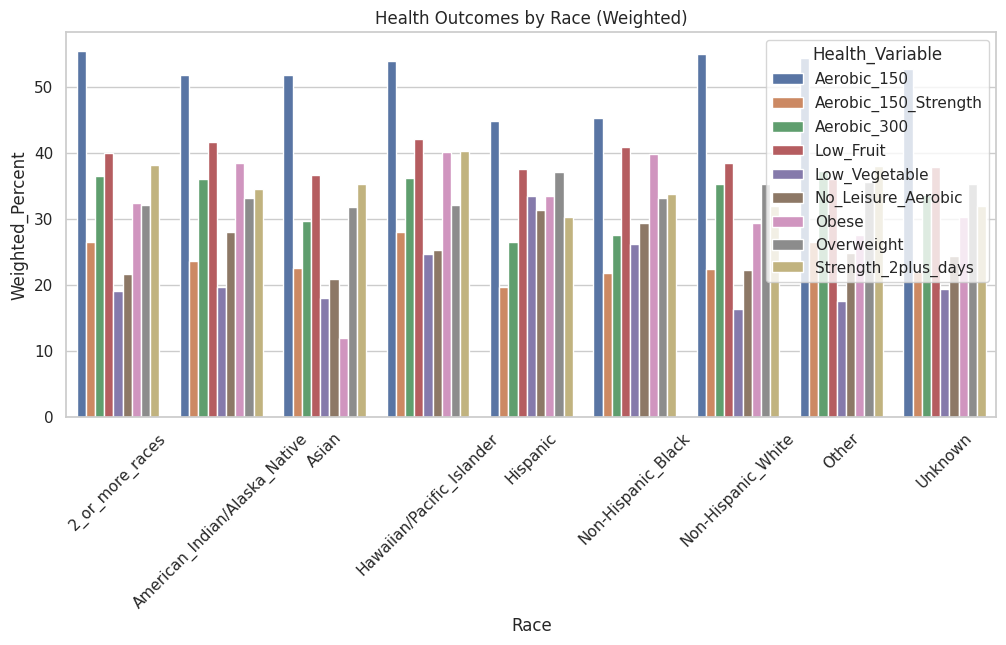

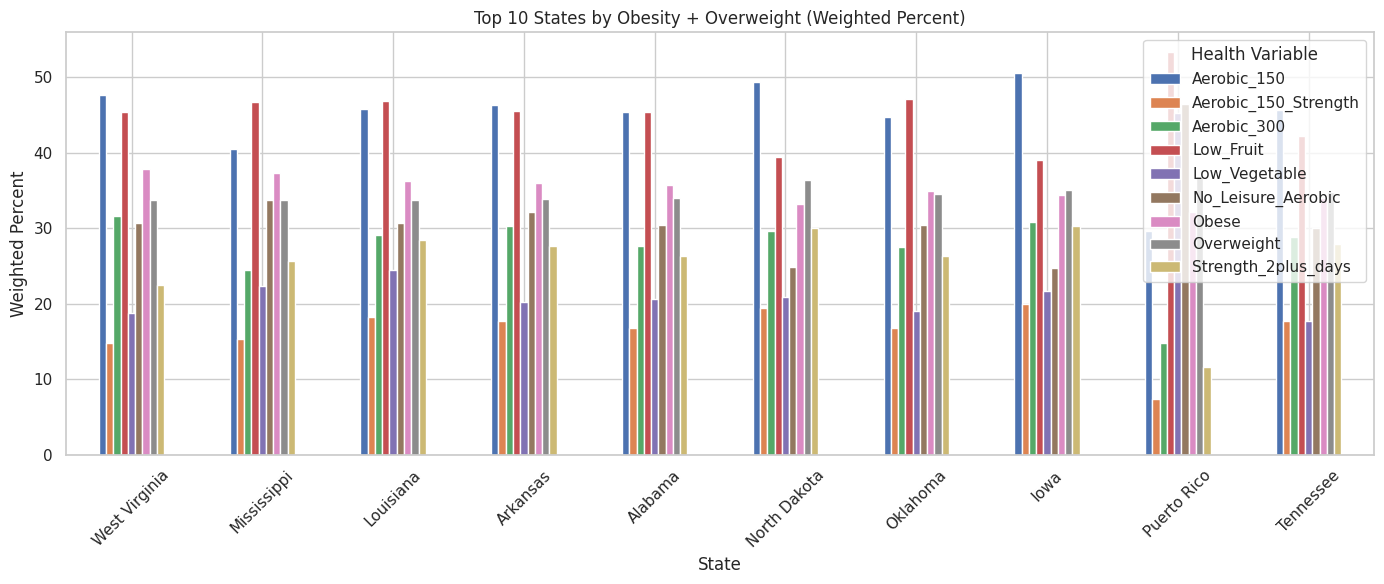


Top 10 States by Obesity + Overweight:

Health_Variable  Aerobic_150  Aerobic_150_Strength  Aerobic_300  Low_Fruit  \
State                                                                        
West Virginia      47.677453             14.800795    31.615749  45.381695   
Mississippi        40.530389             15.332642    24.386753  46.652924   
Louisiana          45.808638             18.247556    29.044551  46.808897   
Arkansas           46.284715             17.729931    30.231860  45.468927   
Alabama            45.394162             16.771799    27.615891  45.315706   
North Dakota       49.316339             19.346737    29.658769  39.468153   
Oklahoma           44.765591             16.794937    27.527346  47.084919   
Iowa               50.534132             19.884328    30.792036  38.980779   
Puerto Rico        29.571582              7.407759    14.793294  53.251906   
Tennessee          45.686400             17.738335    28.752739  42.186006   

Health_Variable  Low_V

In [72]:
# ============================================================
# FULL EDA + APRIORI PIPELINE
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

sns.set(style="whitegrid")

# ============================================================
# 1. COPY & CLEAN DATA
# ============================================================

df = Obesity_clean.copy()
df = df.dropna(subset=["Health_Variable", "Value_Percent", "Sample_Size"])

demo_cols = ["Sex", "Age_Group", "Income_Group", "Education_Level", "Race"]
for col in demo_cols:
    df[col] = df[col].replace("None", np.nan)
    df[col] = df[col].fillna("Unknown")

# ============================================================
# 2. DISTRIBUTION OF HEALTH PERCENTAGES
# ============================================================

plt.figure(figsize=(10,6))
sns.histplot(df["Value_Percent"], bins=40, kde=True)
plt.title("Distribution of Health Percentages")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Health_Variable", y="Value_Percent")
plt.xticks(rotation=45)
plt.title("Distribution by Health Variable")
plt.show()

# ============================================================
# 3. WEIGHTED MEAN HELPER FUNCTION
# ============================================================

def weighted_mean(x):
    return np.average(x["Value_Percent"], weights=x["Sample_Size"])

# ============================================================
# 4. DEMOGRAPHIC EFFECT (WEIGHTED)
# ============================================================

for col in demo_cols:
    agg = df.groupby([col, "Health_Variable"]).apply(weighted_mean).reset_index(name="Weighted_Percent")
    plt.figure(figsize=(12,5))
    sns.barplot(data=agg, x=col, y="Weighted_Percent", hue="Health_Variable")
    plt.title(f"Health Outcomes by {col} (Weighted)")
    plt.xticks(rotation=45)
    plt.show()

# ============================================================
# 5. STATE-LEVEL ANALYSIS (TOP 10 BY OBESITY + OVERWEIGHT)
# ============================================================

state_health = df.groupby(["State", "Health_Variable"]).apply(weighted_mean).reset_index(name="Weighted_Percent")
state_table = state_health.pivot(index="State", columns="Health_Variable", values="Weighted_Percent")

# Compute Worst_Score based only on Obese + Overweight
state_table["Worst_Score"] = state_table[["Obese", "Overweight"]].sum(axis=1)

# Top 10 states
top_states_table = state_table.sort_values("Worst_Score", ascending=False).head(10)
top_states_metrics = top_states_table.drop(columns=["Worst_Score"])

# Plot
top_states_metrics.plot(kind="bar", figsize=(14,6))
plt.title("Top 10 States by Obesity + Overweight (Weighted Percent)")
plt.ylabel("Weighted Percent")
plt.xticks(rotation=45)
plt.legend(title="Health Variable")
plt.tight_layout()
plt.show()

# Display table
print("\nTop 10 States by Obesity + Overweight:\n")
print(top_states_metrics)

# ============================================================
# 6. QUANTILE BINNING OF VALUE_PERCENT
# ============================================================

df["Value_Quantile"] = pd.qcut(df["Value_Percent"], q=3, labels=["Low", "Medium", "High"])

# ============================================================
# 7. APRIORI PER DEMOGRAPHIC
# ============================================================

min_support = 0.30  # adjust as needed
min_confidence = 0.6

for demo in demo_cols:

    # Prepare transactions
    transactions = []
    for _, row in df.iterrows():
        if row[demo] == "Unknown":
            continue
        basket = [
            f"Health={row['Health_Variable']}",
            f"Value={row['Value_Quantile']}",
            f"{demo}={row[demo]}"
        ]
        transactions.append(basket)

    if len(transactions) == 0:
        print(f"\nNo valid transactions for {demo}")
        continue

    # One-hot encode
    te = TransactionEncoder()
    df_encoded = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

    # Frequent itemsets
    frequent_itemsets_all = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Filter itemsets for display: >=2 items, no Unknown
    frequent_itemsets = frequent_itemsets_all[
        (frequent_itemsets_all["itemsets"].apply(len) >= 1) &
        (~frequent_itemsets_all["itemsets"].apply(lambda x: any("Unknown" in str(i) for i in x)))
    ].sort_values("support", ascending=False)

    print(f"\n================ {demo.upper()} =================")
    print("Frequent Itemsets (>=2 items, no Unknown):")
    print(frequent_itemsets.head(10))

    # Association rules
    rules = association_rules(frequent_itemsets_all, metric="confidence", min_threshold=min_confidence)

    # Filter rules: Health in consequent, multi-item, no Unknowns
    rules_filtered = rules[
        (rules["consequents"].astype(str).str.contains("Health")) &
        ((rules["antecedents"].apply(len) + rules["consequents"].apply(len)) >= 2) &
        (~rules["antecedents"].apply(lambda x: any("Unknown" in str(i) for i in x))) &
        (~rules["consequents"].apply(lambda x: any("Unknown" in str(i) for i in x)))
    ].sort_values(["lift", "confidence"], ascending=False)

    if rules_filtered.empty:
        print("No valid rules found for this demographic.\n")
        continue

    # Print top rules
    print("\nTop Health Association Rules:")
    for _, r in rules_filtered.head(10).iterrows():
        lhs = ", ".join(list(r["antecedents"]))
        rhs = ", ".join(list(r["consequents"]))
        print(f"{lhs}  --->  {rhs} | Support: {r['support']:.3f}, Confidence: {r['confidence']:.3f}, Lift: {r['lift']:.3f}")


**(PART D) PERFORM EDA**


---

***Method***

Prior to beginning the EDA, I first clean my table to remove any columns that are missing quantitative values and then breaking out information into columns that are easier to work with. I breakout the health variables into different values to quanitfy individually and further look for information such as exercise routine. Lastly, I pivoted the results reported as as column values such as sex, age, income, and race. This allowed for each to have its own column that is able to provide the information in a more clean format and allow for later combining to anlayze cross-attribute impact.


To begin, my implementation goes through each attribute columns fills any empty data point with "Unknown" to ensure it is removed from consideration in the final results. I do this to allow the report to provide more insight and meaning to the details we find rather than being diluted with unknown variables. Additionally, I find a weighted mean for the datasets rows by considering the weighted percentage of the sample size of a particular group. This allows for a fair attribution of itemsets and support to be discovered as we lump the attributes. We are also able to now lump Obesity and Overweight numbers into a "Worse Score" variable that allows us to rank outcomes better.

The less intuitive step comes at the breakup of quantiles. This is to aid in the Apriori analysis, essentially finding which rows have a high, medium or low value of pertentage in support in order to better bucket these items. In short, it will later help in seeing whether there is an association in the amount of support that is given to an attribute vs going based off of just the frequency of that attribute.

Moving into the actual Apriori algorithm itself, I lump these calculated measurables into a workable dataframe to then analyze the itemset, searching for any sets with at least 1 attributes (skipping unknowns), then attempting to build association rules. The reason for 1 attribute is just to analayze each individually rather than joint. Joint discoveries will require further manipulations that I will dive into in a later analysis.

***Parameters***

*   ***min_support*** - the dataset does not have very many largely supported itemsets, however, it does provide moderate support with a 30% minimum. Listing the top 10, we still get a good view of what we are working with.

*   ***min_confidence*** - when looking for rules, we want them to be reliably accurate, which is why I opted for a higher support threshold of 60% when searching for association rules.



***Resources***


---

**Collaborators**

- None

**Web Sources**

- https://networkx.org/documentation/stable/reference/functions.html

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

**AI Tools**

- I used ChatGPT heavily for this part since the nature is more complex. To begin, I provided my intial dataset pertaining to obesity and then provided all code I had for the project up to this point. I then explained to it the way I wanted to clean dataframe to be formatted and it got me to a point I liked. I confirmed that it was correct, calculating the anticipated count of records myself in the dataset within excel. I then ensured it was inerpretting the use of each column correctly and told it want to perform an EDA that includes an Apriori algorithm in order to find frequent itemsets and association rules. The AI became confused on parameter needs and formatting of tables, but eventually I worked around where it was giving me exactly type of lookup I wanted. I remanipulated it to where it was analyzing each attribute individually for now.

**Citations**

- None

**(PART E) INITIAL INSIGHTS AND DIRECTION**


---

***Observations***

On initial interpretation of the outcomes, it appears that most of the worst health scores are scattered around more rural states and midwestern/southern states such as West Virginia, Mississippi and Louisiana. What these state have in common is a relatively low amount of stength training and moderately high level of no physical activity. Interestingly, if they do exercise they seem to have a focus on aerobic activity, but also consistently have low intake of produce, such as fruits and vegitables.

Looking at the attributes of the surveys, not many specific attributes stood out as having high support for causing obesity. However, those with low income or a medium education level had a comparativley high support for contributing to obesity. It can't be ignored though, that these two attributes both had high percentages of data contributing to them, but not too much more than other attributes that went under the radar. Worth noting is theh 50% support for male and female towards obesity. A large quantity is also unknown and I believe these percentages are likely able to be written off to a 50/50 sample set of sexes.

**Hypothesis**

I feel that there will be a connection between income and education level as they pertain to obesity / overweight population statistics. Additionally, this would also contribute to the reason why most of the worst health scores are focused in more of the moderately populated but more rural states and regions. I believe this is a contributing factor, because typically people with higher income and education are likely moving to major hub cities for work. Likewise, psychologically, there could be connection between educational / economic status that is an indicator of the drive and determination that typically accompanies a more fit lifestyle.

***Potential Research Questions***

*   Do education and financial level individually or jointly have a larger impact on overall health score of a population?
*   Do people that live in more populated regions have a better overall health score? What about active regions? Busy?
*   What might regional impact also be able to indicate of age range? That attribute may be even more telling about health score than it currenlty displays. Retirement, family and young adult heavy states need to be considered.




